In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import simps
from matplotlib.pyplot import figure

C:\Users\frank\AppData\Roaming\Python\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\frank\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\frank\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
n = 2*50000 #number of points #100000
rm = 9 #maximal radius #8
dr = rm/n #step size

x1 = np.zeros(n)  #f(r)
x2 = np.zeros(n)  #f'(r)
y1 = np.zeros(n)  #phi(r)
y2 = np.zeros(n)  #phi'(r)

In [3]:
#RK4 to get values at next point:

def p1(rn, x1n, x2n, y1n, y2n, h):
    k1 = x2n
    l1 = -2/rn*x2n + 2*x1n*y1n
    o1 = y2n
    q1 = -2/rn*y2n + 4*math.pi*x1n**2
    
    k2 = x2n + h/2*l1
    l2 = -2/(rn+h/2)*(x2n+h/2*l1) + 2*(x1n+h/2*k1)*(y1n+h/2*o1)
    o2 = y2n + h/2*q1
    q2 = -2/(rn+h/2)*(y2n+h/2*q1) + 4*math.pi*(x1n+h/2*k1)**2
    
    k3 = x2n + h/2*l2
    l3 = -2/(rn+h/2)*(x2n+h/2*l2) + 2*(x1n+h/2*k2)*(y1n+h/2*o2)
    o3 = y2n + h/2*q2
    q3 = -2/(rn+h/2)*(y2n+h/2*q2) + 4*math.pi*(x1n+h/2*k2)**2
    
    k4 = x2n + h*l3
    l4 = -2/(rn+h)*(x2n+h*l3) + 2*(x1n+h*k3)*(y1n+h*o3)
    o4 = y2n + h*q3
    q4 = -2/(rn+h)*(y2n+h*q3) + 4*math.pi*(x1n+h*k3)**2
    
    x1p1 = x1n + h/6*(k1 + 2*k2 + 2*k3 + k4)
    x2p1 = x2n + h/6*(l1 + 2*l2 + 2*l3 + l4)
    y1p1 = y1n + h/6*(o1 + 2*o2 + 2*o3 + o4)
    y2p1 = y2n + h/6*(q1 + 2*q2 + 2*q3 + q4)
    
    return (x1p1, x2p1, y1p1, y2p1)

In [4]:
#initial conditions
p = 0
dp = 1
x1[0] = 1
x2[0] = 0
y1[0] = p
y2[0] = 0
s = np.zeros(4)
r1 = np.arange(dr, rm+dr, dr)
#r1 = np.arange(0, rm, dr)
control = False
counter = 1
a = -5
b = 5

while control == False:
        p = (a + b)/2
        y1[0] = p
        if counter > 100:
                control = True
                print('Did not find solution!')
                print(counter)
                print('p =', p, 'dp=', dp)
                
        for i in range(1,n):
            s = p1(dr*(i-1)+0.0001, x1[i-1], x2[i-1], y1[i-1], y2[i-1], dr)
            #s = p1(dr*i, x1[i-1], x2[i-1], y1[i-1], y2[i-1], dr)
            x1[i] = s[0]
            x2[i] = s[1]
            y1[i] = s[2]
            y2[i] = s[3]
                
            if x1[i]-x1[i-1]>0:
                #p = p-dp
                b = p
                counter = counter + 1
                #print(p)
                break
            
            if x1[i]<0:
                a = p
                #p = p + dp
                #dp = dp/2
                #p = p - dp
                counter = counter + 1
                #print(p)
                break

            if i == n-1:
                control = True
                print('Convergence achieved! p =', p)
                dphi = (y1[i] - y1[i-1])/dr
                c = r1[i]**2 * dphi
                beta = y1[i] + c/r1[i]
                print('beta = ', beta)
                print('c =', c)
                print('iterations:', counter)

Convergence achieved! p = -2.3025380186936673
beta =  2.453890687992286
c = 3.8827955199050024
iterations: 40


M_core = 0.917941418451413
DIMENSIONLESS
total mass is 3.882670192924137
Radius at 90% mass is 1.76049
Radius of core  is 0.6901200000000001


Text(0.5, 1.0, 'Wavefunction profile for phi0 = -2.3025')

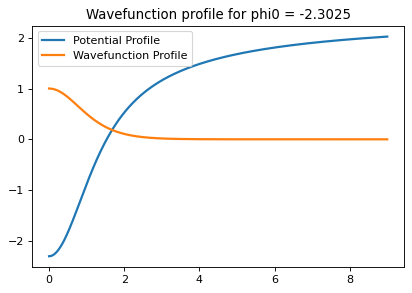

In [5]:
#Calculate full width at half maximum density:

#difflist = []
#for i in range(n):
    #difflist.append(abs(x1[i]**2 - x1[0]**2/2))
#fwhm = 2*r1[difflist.index(min(difflist))]

#Calculate the (dimensionless) mass of the soliton:
intlist = r1**2*x1**2
mass = simps(intlist,r1)*4*np.pi

#Calculate the radius containing 90% of the mass

partial = 0.
for i in range(n):
    partial = partial + intlist[i]*4*np.pi*dr
    if partial >= 0.9*mass:
        r90 = r1[i]
        break

for i in range(n):
    if x1[i]**2 <= 0.5*x1[0]**2:
        rc = r1[i]
        break

mcore = 0.
for i in range(n):
    mcore = mcore + intlist[i]*4*np.pi*dr
    if r1[i] >= rc:
        print ('{}{}'.format('M_core = ', mcore))
        break


print('DIMENSIONLESS')
print ('{}{}'.format('total mass is ', mass))
print ('{}{}'.format('Radius at 90% mass is ', r90))
print ('{}{}'.format('Radius of core  is ', rc))

#Save the numpy array and plots of the potential and wavefunction profiles.
psi_array = np.array(x1)
r_array = np.array(r1)
np.save('initial_f_3d', psi_array)
np.save('r_axis_for_f_3d', r_array)

figure(figsize=(6, 4), dpi=80)
plt.plot(r1,y1, label='Potential Profile', linewidth = "2")
plt.plot(r1,x1, label='Wavefunction Profile', linewidth = "2")
plt.legend()
plt.title('{}{}'.format('Wavefunction profile for phi0 = ', round(p, 4)))

In [6]:
#Save the numpy array and plots of the potential and wavefunction profiles.
#psi_array = np.array(np.sqrt(alpha**2*ml*x1**2))
psi_array = np.array(x1)
r_array = np.array(r1)
gpot_array = np.array(y1)
#gpot_array = np.array(np.sqrt(alpha)**(-1)*l**2*m/t**2*y1)
np.save('initial_f_3d', psi_array)
np.save('r_axis_for_f_3d', r_array)
np.save('gpot_f_3d', gpot_array)

# Compare with best fit from paper, recover units:

In [7]:
mb = 10**(-23) #mass of particle, free parameter
#l = 121*(10**(-23)/mb)**(1/2) #L unit
G = 4.3*10**(-6)*(3.24*10**(-17))**2 #kpc Msun^-1 (kpc/s)^2
Omegam0 = 0.273 #OmegaBAR + OmegaDM
H0 = 70*10**(-3)*3.24*10**(-17) #kpc s^-1 kpc^-1
hbar = 6.582*10**(-16) #eV s
c = 9.716*10**(-12) #kpc s^-1
m = 1/G*(8*np.pi/(3*H0**2*Omegam0))**(-1/4)*(hbar*c**2/mb)**(3/2)
l = (8*np.pi*hbar**2/(3*mb**2/c**4*H0**2*Omegam0))**(1/4)
t = (8*np.pi/(3*H0**2*Omegam0))**(1/2)
#m = 7*10**7*(10**(-23)/mb)**(3/2) #Msun
rcore = rc*l
ml = m/l**3

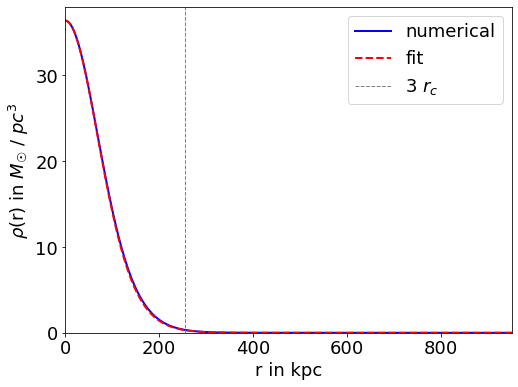

In [8]:
x1i = 1.9*(mb/10**(-23))**(-2)*(rcore)**(-4)/(1+9.1*10**(-2)*(0)**2/(rcore)**2)**8*10**(9)
alpha = np.sqrt(x1i/ml) #rescaling constant
rad = np.sqrt(alpha)**(-1)*l*r1 #radius to compare with solution, L needed to restore units of lenght

figure(figsize=(8, 6))
plt.plot(rad, alpha**2*ml*x1**2, 'b-', label = 'numerical', linewidth = "2")
plt.plot(rad, 1.9*(mb/10**(-23))**(-2)*(rcore)**(-4)/(1+9.1*10**(-2)*(rad)**2/(rcore)**2)**8*10**(9), 'r--', label = 'fit', linewidth = "2")
plt.xlabel('r in kpc', fontsize=18)
plt.ylabel(r'$\rho$' + '(r) in $M_\u2609$ / $pc^3$', fontsize=18 )
plt.axvline(x=3*rcore, color="gray", linewidth=1, linestyle="dashed", label="3 $r_c$")
plt.xlim(0,950)
plt.ylim(0, 38)
plt.legend(fontsize=18)
plt.yticks(np.arange(0, 35, step=10), fontsize=18)
plt.xticks(np.arange(0, 900, step=200), fontsize=18)

plt.savefig("Soliton_Solution.jpg", dpi=200)
plt.show()


Text(0.5, 1.0, 'Wavefunction profile for phi0 = -2.3025')

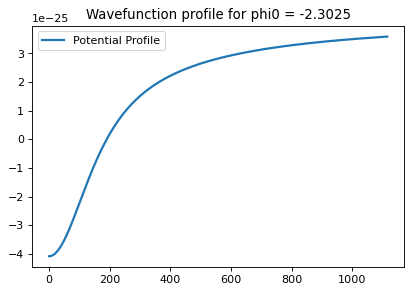

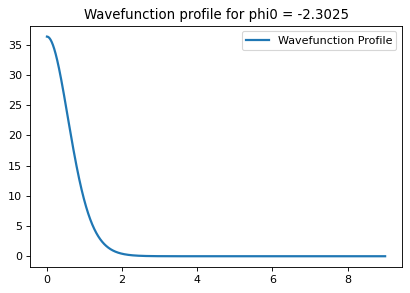

In [9]:
figure(figsize=(6, 4), dpi=80)
plt.plot(rad,np.sqrt(alpha)**(-1)*l**2*m/t**2*y1, label='Potential Profile', linewidth = "2")
#plt.plot(r1,alpha**2*ml*x1**2, label='Wavefunction Profile', linewidth = "2")
plt.legend()
plt.title('{}{}'.format('Wavefunction profile for phi0 = ', round(p, 4)))

figure(figsize=(6, 4), dpi=80)
#plt.plot(rad,np.sqrt(alpha)**(-1)*l**2*m/t**2*y1, label='Potential Profile', linewidth = "2")
plt.plot(r1,alpha**2*ml*x1**2, label='Wavefunction Profile', linewidth = "2")
plt.legend()
plt.title('{}{}'.format('Wavefunction profile for phi0 = ', round(p, 4)))

In [10]:
rcore

85.01753779100788

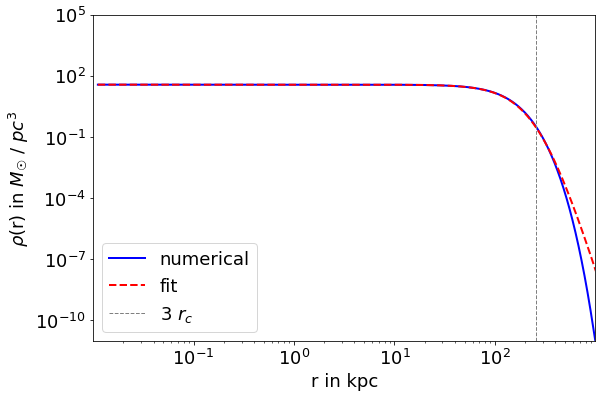

In [11]:
figure(figsize=(9, 6))

plt.loglog(rad , alpha**2*ml*x1**2, 'b-', label = 'numerical', linewidth = "2")
plt.loglog(rad, 1.9*(mb/10**(-23))**(-2)*(rcore)**(-4)/(1+9.1*10**(-2)*(rad)**2/(rcore)**2)**8*10**(9), 'r--', label = 'fit', linewidth = "2")
plt.xlabel('r in kpc', fontsize=18)
plt.ylabel(r'$\rho$' + '(r) in $M_\u2609$ / $pc^3$', fontsize=18 )
plt.axvline(x=3*rcore, color="gray", linewidth=1, linestyle="dashed", label="3 $r_c$")
plt.xlim(10**(-2),10**(3))
plt.ylim(10**(-11), 10**(5))
plt.legend(fontsize=18)
plt.yticks(np.array([10**(-10), 10**(-7), 10**(-4), 10**(-1), 10**2, 10**5]), fontsize=18)
plt.xticks(np.array([10**(-1), 10**0, 10**1, 10**2]), fontsize=18)

plt.savefig("Soliton_SolutionLog.jpg", dpi=200)

plt.show()

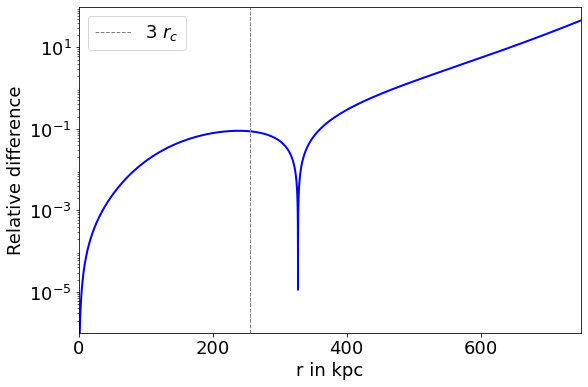

In [12]:
figure(figsize=(9, 6))
plt.plot(rad , np.abs((alpha**2*ml*x1**2 - 1.9*(mb/10**(-23))**(-2)*(rcore)**(-4)/(1+9.1*10**(-2)*(rad)**2/(rcore)**2)**8*10**(9))/(alpha**2*ml*x1**2)), 'b-', linewidth = "2")
#plt.loglog(rad, 1.9*(mb/10**(-23))**(-2)*(rc)**(-4)/(1+9.1*10**(-2)*(rad)**2/(rc)**2)**8*10**(9), 'r--', label = 'fit', linewidth = "3")

#plt.ylabel('Relative difference' )

plt.xlabel('r in kpc', fontsize=18)
plt.ylabel('Relative difference', fontsize=18 )
plt.axvline(x=3*rcore, color="gray", linewidth=1, linestyle="dashed", label="3 $r_c$")
#plt.xlim(10**(-2),10**(3))
#plt.ylim(10**(-11), 10**(5))

#plt.axvline(x=3*rcore)
plt.legend(fontsize=18)
plt.xlim(0,750)
plt.ylim(10**(-6),1e2)
plt.yscale('log')
plt.yticks(np.array([10**(-5), 10**(-3), 10**(-1), 10**(1)]), fontsize=18)
plt.xticks(np.arange(0, 750, step=200), fontsize=18)
plt.savefig("Soliton_Sol_Rel_Difference.jpg", dpi=200)
plt.show()

# Use scaling relations to find solution for any given total mass (r--> r/lambda, M-->lambda*M)

In [13]:
intlistt = ml*rad**2*x1**2*alpha**2
mtot = simps(intlistt,rad)*4*np.pi
print(mass)

3.882670192924137


In [14]:
mtott = mass*np.sqrt(alpha)*m
print('{}{}'.format('Total mass in Solar masses is ', mtott))
print('{}{}'.format('Total mass in Solar masses is ', mtot))

Total mass in Solar masses is 268158061.28942403
Total mass in Solar masses is 268158061.2894241


In [15]:
#Desired total mass in Solar masses
massnew = mtot/10

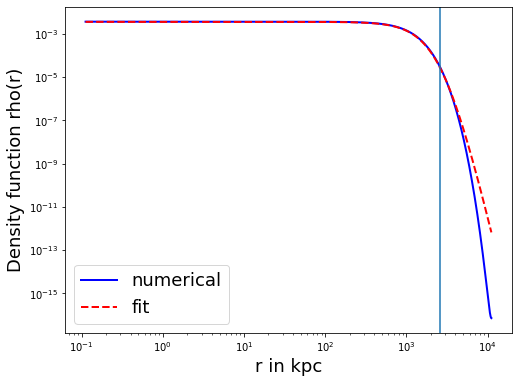

In [16]:
lambda1 = massnew/mtot
#print(lambda1)

rcn = 0
#find new core radius:
for i in range(n):
    if alpha**2*ml*x1[i]**2*lambda1**4 <= 0.5*alpha**2*ml*x1[0]**2*lambda1**4:
        rcn = rad[i]/lambda1
        break


x2i = 1.9*(mb/10**(-23))**(-2)*(rcn)**(-4)/(1+9.1*10**(-2)*(0)**2/(rcn)**2)**8*10**(9)
alpha = np.sqrt(x1i/ml) #rescaling constant
rad = np.sqrt(alpha)**(-1)*l*r1 #radius to compare with solution, L needed to restore units of lenght

#print((x2i/x1i)**(1/4))
#lambda1 = (x2i/x1i)**(1/4)

figure(figsize=(8, 6))
#alpha**2*ml*x1**2*lambda1**4*x2i/lambda1**4
#plt.plot(rad/lambda1, alpha**2*ml*x1**2*x2i/x1i, 'b-', label = 'numerical', linewidth = "2")
plt.loglog(rad/lambda1, alpha**2*ml*x1**2*lambda1**4, 'b-', label = 'numerical', linewidth = "2")
plt.loglog(rad/lambda1, 1.9*(mb/10**(-23))**(-2)*(rcn)**(-4)/(1+9.1*10**(-2)*(rad/lambda1)**2/(rcn)**2)**8*10**(9), 'r--', label = 'fit', linewidth = "2")
plt.xlabel('r in kpc', fontsize=18)
plt.ylabel('Density function rho(r)', fontsize=18)
#plt.axvline(x=3*rc/lambda1)
plt.axvline(x=3*rcn)
#plt.xlim(0,5*rcn)
#plt.ylim(1e-18,1e-16)
plt.legend(fontsize=18)
plt.show()

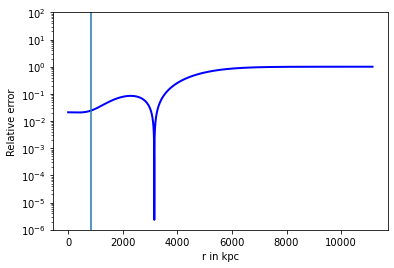

In [17]:
sol1 = alpha**2*ml*x1**2*lambda1**4
#sol1 = alpha**2*ml*x1**2*x2i/x1i
fit = 1.9*(mb/10**(-23))**(-2)*(rcn)**(-4)/(1+9.1*10**(-2)*(rad/lambda1)**2/(rcn)**2)**8*10**(9)


plt.plot(rad/lambda1, np.abs(fit-sol1)/fit, 'b-', label = 'relative error', linewidth = "2")
plt.xlabel('r in kpc')
plt.ylabel('Relative error' )
plt.axvline(x=rcn)
#plt.xlim(0,800)
plt.ylim(10**(-6),1e2)
plt.yscale('log')
plt.show()

# Plotting solutions with some mass Mtot and Mtot/10

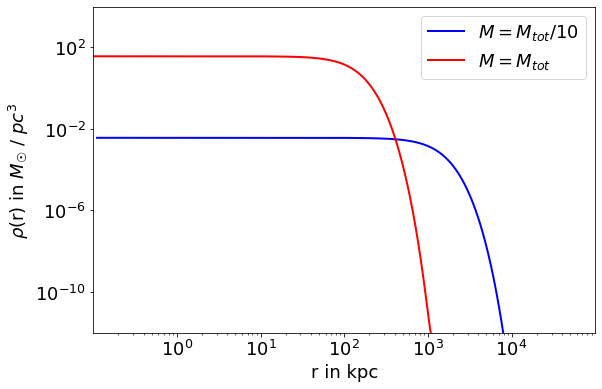

In [18]:
figure(figsize=(9, 6))
#alpha**2*ml*x1**2*lambda1**4*x2i/lambda1**4
#plt.plot(rad/lambda1, alpha**2*ml*x1**2*x2i/x1i, 'b-', label = 'numerical', linewidth = "2")
plt.loglog(rad/lambda1, alpha**2*ml*x1**2*lambda1**4, 'b-', label = '$M = M_{tot}/10$', linewidth = "2")
plt.loglog(rad, alpha**2*ml*x1**2, 'r-', label = '$M = M_{tot}$', linewidth = "2")
#plt.loglog(rad/lambda1, 1.9*(mb/10**(-23))**(-2)*(rcn)**(-4)/(1+9.1*10**(-2)*(rad/lambda1)**2/(rcn)**2)**8*10**(9), 'r--', label = 'fit', linewidth = "2")
plt.xlabel('r in kpc', fontsize=18)
plt.ylabel(r'$\rho$' + '(r) in $M_\u2609$ / $pc^3$', fontsize=18 )
#plt.axvline(x=rcore, color='gray', linestyle = "dashed")
#plt.axvline(x=rcn, color='gray', linestyle = "dashed")
plt.xlim(1e-1,1e5)
plt.ylim(1e-12,1e4)
plt.legend(fontsize=18)
plt.yticks(np.array([10**(-10), 10**(-6), 10**(-2), 10**(2)]), fontsize=18)
plt.xticks(np.array([10**(0), 10**(1), 10**(2), 10**(3), 10**4]), fontsize=18)
plt.savefig("DifferentMasses_Solitons.jpg",dpi=200)
plt.show()

In [19]:
intlist = ml*(rad/lambda1)**2*x1**2*alpha**2*lambda1**4
mass1 = (lambda1)**(2)*simps(intlistt,rad/lambda1)*4*np.pi
#intlist2 = ml*(rad/lambda1)**2*x1**2*alpha**2*x2i/x1i
#mass2 = simps(intlist2,rad/lambda1)*4*np.pi
print(mtot)

268158061.2894241


In [22]:
mtot/mass1

10.0

In [30]:
rcn

854.6170691059925

In [31]:
rcore

85.01753779100788

# Compare Mass scaling

In [22]:
sol2 = alpha**2*ml*x1**2*lambda1**4
radius2 = rad/lambda1
sol1 = alpha**2*ml*x1**2
radius1 = rad

In [23]:
partmass = np.zeros(4)
for i in range(1,5):
    partmass[i-1] = 0
    for j in range(n):
        partmass[i-1] = partmass[i-1] + np.pi*4*radius1[j]**2*sol1[j]
        if radius1[j] >= i*rcore:
            print ('{}{}{}{}'.format('Core Radius times ', i, '; M_partial = ', partmass[i-1]))
            break

print('Relative factors:')
#print(partmass[2]/partmass[1], partmass[1]/partmass[0])
print((partmass[3]-partmass[2])/partmass[2], (partmass[2]-partmass[1])/partmass[1], (partmass[1]-partmass[0])/partmass[0])

Core Radius times 1; M_partial = 5623372625.936149
Core Radius times 2; M_partial = 18013762211.788273
Core Radius times 3; M_partial = 22988977612.571785
Core Radius times 4; M_partial = 23926014061.91105
Relative factors:
0.040760248895402584 0.27618968998756477 2.203373386409626


In [24]:
partmass2 = np.zeros(4)
for i in range(1,5):
    partmass2[i-1] = 0
    for j in range(n):
        partmass2[i-1] = partmass2[i-1] + np.pi*4*radius2[j]**2*sol2[j]
        if radius2[j] >= i*rcn:
            print ('{}{}{}{}'.format('Core Radius times ', i, '; M_partial = ', partmass2[i-1]))
            break

print('Relative factors:')
#print(partmass2[2]/partmass2[1], partmass2[1]/partmass2[0])
print((partmass2[3]-partmass2[2])/partmass2[2], (partmass2[2]-partmass2[1])/partmass2[1], (partmass2[1]-partmass2[0])/partmass2[0])

Core Radius times 1; M_partial = 56883441.41989759
Core Radius times 2; M_partial = 181071326.97965938
Core Radius times 3; M_partial = 230208865.08571857
Core Radius times 4; M_partial = 239320271.75672114
Relative factors:
0.039578869682581175 0.271371171381425 2.183199230915754


In [25]:
#Save the numpy array and plots of the potential and wavefunction profiles.
#psi_array = np.array(np.sqrt(alpha**2*ml*x1**2))
psi_array = np.array(x1)
r_array = np.array(r1)
gpot_array = np.array(y1)
#gpot_array = np.array(np.sqrt(alpha)**(-1)*l**2*m/t**2*y1)
np.save('initial_f', psi_array)
np.save('r_axis_for_f', r_array)
np.save('gpot_f', gpot_array)

In [26]:
r1

array([9.00000e-05, 1.80000e-04, 2.70000e-04, ..., 8.99982e+00,
       8.99991e+00, 9.00000e+00])

In [27]:
psi_array

array([1.00000000e+00, 9.99999987e-01, 9.99999957e-01, ...,
       1.39613952e-07, 1.39612770e-07, 1.39611593e-07])

In [28]:
alpha**2*ml*x1**2

array([3.63680075e+01, 3.63680066e+01, 3.63680044e+01, ...,
       7.08887228e-13, 7.08875226e-13, 7.08863269e-13])

In [29]:
np.sqrt(alpha**2*ml*x1**2)

array([6.03058932e+00, 6.03058924e+00, 6.03058906e+00, ...,
       8.41954410e-07, 8.41947282e-07, 8.41940182e-07])